Inspiration: Udemy "Customer Analytics in Python" Link: https://www.udemy.com/course/customer-analytics-in-python/

Context: We've done descriptive analysis of purchase data previously. Now we are ready for predictive modeling.

Objective: To predict purchase incidence, brand choice, and purchase quantities via diff data modelings.

Steps performed in this script:

Model one -- Predict purchase probability
1. Model type: Binomial Logistic Regression Model
2. Predict price elasticity of purchase probability
3. Purchase probability --now per segment
4. Purchase probability -with or without promotions


Model two -- Predict brand choice
1. Model type: Multinomial Logistic Regression Model
2. Own price elasticity for brand choice (sampled with brand_5)
3. Cross price elasticity (crossed with brand_4)
4. Own and cross-price elasticity for each segment (focused on brand_5 and 4)

Model one and two outcomes: Different segments behave differently, can create customized marketing strategy per the insights.


Model three - Predict purchase quantity
1. Model type: Linear Regression
2. Model features (price, and promotion).
3. Predict price elasticity with and without promotions.

Outcome: Similar results (with/without promotion) - Promotion is not key in customer decision of purchase quantity.



## Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

from sklearn.linear_model import LogisticRegression 

import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression 
# a logistic regression is a classification method that output prob between 0 and 1.

## Data Preparation

In [2]:
df_purchase = pd.read_csv('purchase data.csv') # Load data

scaler = pickle.load(open('scaler.pickle', 'rb')) # Import scaler
pca = pickle.load(open('pca.pickle', 'rb')) 
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

## Purchase Probability Model

In [3]:
Y=df_pa['Incidence']

In [4]:
X=pd.DataFrame()
X['Mean_Price']=(df_pa['Price_1']+
                 df_pa['Price_2']+
                 df_pa['Price_3']+
                 df_pa['Price_4']+
                 df_pa['Price_5'])/5

In [5]:
model_purchase=LogisticRegression(solver='sag')
model_purchase.fit(X,Y)

LogisticRegression(solver='sag')

In [6]:
model_purchase.coef_

array([[-2.34677748]])

## Price Elasticity of Purchase Probability

In [7]:
# 1% change in price (Price elasticity), its influence to % in purchase (purchase probability).
df_pa[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [8]:
price_range=np.arange(0.5,3.5,0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [9]:
df_price_range=pd.DataFrame(price_range)

In [10]:
Y_pr=model_purchase.predict_proba(df_price_range) # Fitted using avg price and incidence
Y_pr

array([[0.08183166, 0.91816834],
       [0.08361231, 0.91638769],
       [0.0854281 , 0.9145719 ],
       [0.08727957, 0.91272043],
       [0.08916725, 0.91083275],
       [0.09109169, 0.90890831],
       [0.09305341, 0.90694659],
       [0.09505297, 0.90494703],
       [0.09709089, 0.90290911],
       [0.09916772, 0.90083228],
       [0.10128399, 0.89871601],
       [0.10344023, 0.89655977],
       [0.10563698, 0.89436302],
       [0.10787477, 0.89212523],
       [0.11015413, 0.88984587],
       [0.11247558, 0.88752442],
       [0.11483964, 0.88516036],
       [0.11724682, 0.88275318],
       [0.11969764, 0.88030236],
       [0.12219259, 0.87780741],
       [0.12473218, 0.87526782],
       [0.1273169 , 0.8726831 ],
       [0.12994722, 0.87005278],
       [0.13262363, 0.86737637],
       [0.13534659, 0.86465341],
       [0.13811655, 0.86188345],
       [0.14093396, 0.85906604],
       [0.14379925, 0.85620075],
       [0.14671285, 0.85328715],
       [0.14967516, 0.85032484],
       [0.

In [11]:
purchase_pr=Y_pr[:][:,1]

In [12]:
pe=model_purchase.coef_[:,0]*price_range*(1-purchase_pr) # E=beta * price *(1-Pr(purchase))
# Purchase prob elasticity: E= (diff purchase/purchase) /(diff price/price)
# Here is the pur prob elas for all price ranged between (0.5, 3, 0.01)

In [13]:
df_price_elasticities=pd.DataFrame(price_range)

In [14]:
df_price_elasticities=df_price_elasticities.rename(columns={0:'Price_Point'})
df_price_elasticities['Mean_PE']=pe
df_price_elasticities # each row we have the price, and its elasticity --> define avg customers purchase behavior.

,Price_Point,Mean_PE
0,0.50,-0.096020
1,0.51,-0.100072
2,0.52,-0.104250
3,0.53,-0.108558
4,0.54,-0.112998
...,...,...
295,3.45,-8.007891
296,3.46,-8.033139
297,3.47,-8.058352
298,3.48,-8.083531


In [15]:
pd.options.display.max_rows=None 
# set global configuration-show all rows without truncating the middle.
# Tempt use only, if reset after use- pd.options.display.max_rows=10 or any number

df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096020
1,0.51,-0.100072
2,0.52,-0.104250
3,0.53,-0.108558
4,0.54,-0.112998
5,0.55,-0.117575
6,0.56,-0.122290
7,0.57,-0.127149
8,0.58,-0.132153
9,0.59,-0.137307


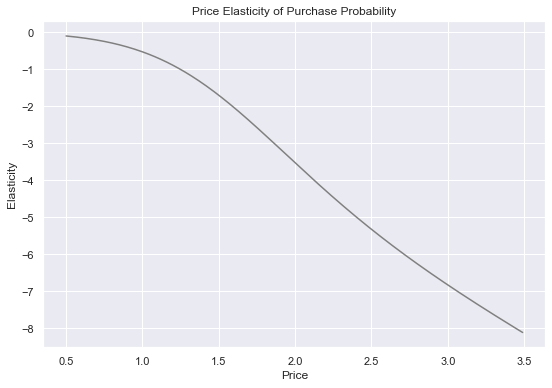

In [16]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability');

# |E|>1 elastic (1% change in price leads to 1%+ in purchase prob), otherwise in elastic
# Use case: \E|<1, recommend increase price, as less drop in purchase prob.
# This sample, price 1.25 (-1.003723) is the transition point (so below 1.25, we can increase price)

## Purchase Probability by Segments

### Segment 1 - Career-Focused

In [17]:
# Same strategy on handling data as above, here we take segment more specific.
df_price_elas_segm_1=df_pa[df_pa['Segment']==1]
Y=df_price_elas_segm_1['Incidence']
X=pd.DataFrame()
X['Mean_price_segm_1']=(df_price_elas_segm_1['Price_1']+
                        df_price_elas_segm_1['Price_2']+
                        df_price_elas_segm_1['Price_3']+
                        df_price_elas_segm_1['Price_4']+
                        df_price_elas_segm_1['Price_5'])/5
model_purchase.fit(X,Y)
model_purchase.coef_  # For segm 1: now get avg price and the incidence coef (Less elastic than overall -2.347)

array([[-1.7118321]])

In [18]:
Y_pr=model_purchase.predict_proba(df_price_range)
purchase_pr=Y_pr[:][:,1]
pe_segm_1=model_purchase.coef_[:,0]*price_range*(1-purchase_pr) # coef_ here like a scalar,then multiplied element-wise

In [19]:
df_price_elasticities['Mean_PE_Segm_1']=pe_segm_1
df_price_elasticities

,Price_Point,Mean_PE,Mean_PE_Segm_1
0,0.50,-0.096020,-0.119085
1,0.51,-0.100072,-0.123268
2,0.52,-0.104250,-0.127544
3,0.53,-0.108558,-0.131915
4,0.54,-0.112998,-0.136382
5,0.55,-0.117575,-0.140947
6,0.56,-0.122290,-0.145611
7,0.57,-0.127149,-0.150376
8,0.58,-0.132153,-0.155243
9,0.59,-0.137307,-0.160214


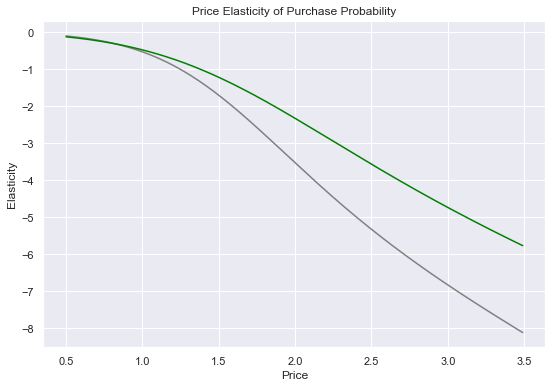

In [20]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segm_1,color='green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability');

# Segm 1 is less elastic vs. overall 
# Tipping point: Segm_1($1.39, elast -1.01) vs. overall ($1.25, -1.00)
# Segm 1 is $0.14 ($1.39-1.25) higher vs overall in tipping point 

### Segment 2 - Fewer-opportunities

In [21]:
df_price_elas_segm_2=df_pa[df_pa['Segment']==2]
Y=df_price_elas_segm_2['Incidence']
X=pd.DataFrame()
X['Mean_price_segm_1']=(df_price_elas_segm_2['Price_1']+
                        df_price_elas_segm_2['Price_2']+
                        df_price_elas_segm_2['Price_3']+
                        df_price_elas_segm_2['Price_4']+
                        df_price_elas_segm_2['Price_5'])/5
model_purchase.fit(X,Y)
model_purchase.coef_  

Y_pr=model_purchase.predict_proba(df_price_range)
purchase_pr=Y_pr[:][:,1]
pe_segm_2=model_purchase.coef_[:,0]*price_range*(1-purchase_pr)

df_price_elasticities['Mean_PE_Segm_2']=pe_segm_2
df_price_elasticities

,Price_Point,Mean_PE,Mean_PE_Segm_1,Mean_PE_Segm_2
0,0.50,-0.096020,-0.119085,-0.030809
1,0.51,-0.100072,-0.123268,-0.032570
2,0.52,-0.104250,-0.127544,-0.034418
3,0.53,-0.108558,-0.131915,-0.036356
4,0.54,-0.112998,-0.136382,-0.038389
5,0.55,-0.117575,-0.140947,-0.040521
6,0.56,-0.122290,-0.145611,-0.042755
7,0.57,-0.127149,-0.150376,-0.045098
8,0.58,-0.132153,-0.155243,-0.047553
9,0.59,-0.137307,-0.160214,-0.050125


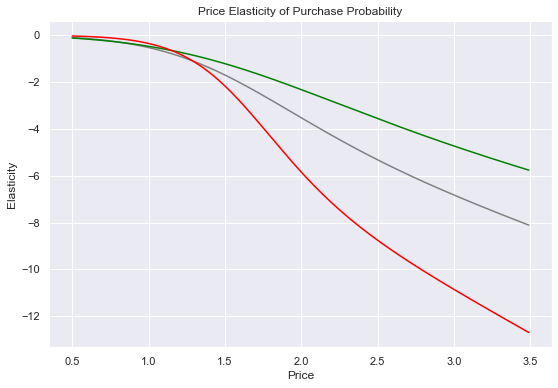

In [22]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segm_1,color='green')
plt.plot(price_range,pe_segm_2,color='red')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability');


# Segm 2 is more elastic(more price sensitive) vs. overall and segm 1
# Tipping point: Segm_2($1.27, -1.02) vs. overall ($1.25, -1.00) vs. Segm_1($1.39, elast -1.01)
# Segm_2 tipping point is higher than overall. Less elastic in a lower prices, become much steeper later on. 
# Reasons:
# 1. segm_2 has the greatest proportion (38%), maybe model is more complex due to the abundant data.
# 2. Purchase behavior related.

### Segment 0 and 3

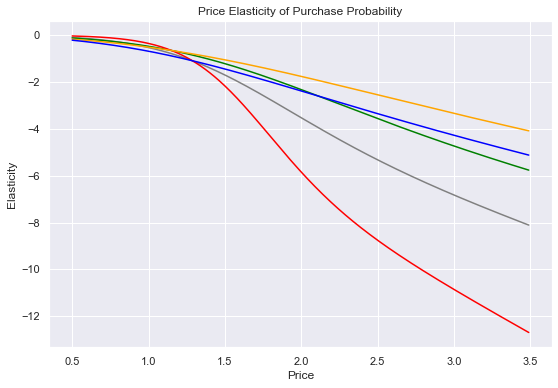

In [23]:
df_price_elas_segm_3=df_pa[df_pa['Segment']==3]
Y=df_price_elas_segm_3['Incidence']
X=pd.DataFrame()
X['Mean_price_segm_1']=(df_price_elas_segm_3['Price_1']+
                        df_price_elas_segm_3['Price_2']+
                        df_price_elas_segm_3['Price_3']+
                        df_price_elas_segm_3['Price_4']+
                        df_price_elas_segm_3['Price_5'])/5
model_purchase.fit(X,Y)
model_purchase.coef_  

Y_pr=model_purchase.predict_proba(df_price_range)
purchase_pr=Y_pr[:][:,1]
pe_segm_3=model_purchase.coef_[:,0]*price_range*(1-purchase_pr)

df_price_elasticities['Mean_PE_Segm_3']=pe_segm_3


df_price_elas_segm_0=df_pa[df_pa['Segment']==0]
Y=df_price_elas_segm_0['Incidence']
X=pd.DataFrame()
X['Mean_price_segm_1']=(df_price_elas_segm_0['Price_1']+
                        df_price_elas_segm_0['Price_2']+
                        df_price_elas_segm_0['Price_3']+
                        df_price_elas_segm_0['Price_4']+
                        df_price_elas_segm_0['Price_5'])/5
model_purchase.fit(X,Y)
model_purchase.coef_  

Y_pr=model_purchase.predict_proba(df_price_range)
purchase_pr=Y_pr[:][:,1]
pe_segm_0=model_purchase.coef_[:,0]*price_range*(1-purchase_pr)

df_price_elasticities['Mean_PE_Segm_0']=pe_segm_0
df_price_elasticities


plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey') # overall
plt.plot(price_range,pe_segm_1,color='green') # Career-Focused
plt.plot(price_range,pe_segm_2,color='red') # Fewer-opportunities
plt.plot(price_range,pe_segm_3,color='orange') # Well-Off
plt.plot(price_range,pe_segm_0,color='blue') # Standard
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability');

## Purchase Probability with Promotion Feature

### Data preparation

In [24]:
Y=df_pa['Incidence']

X=pd.DataFrame()
X['Mean_Price']=(df_pa['Price_1']+
                 df_pa['Price_2']+
                 df_pa['Price_3']+
                 df_pa['Price_4']+
                 df_pa['Price_5'])/5

X['Mean_Promotion']=(df_pa['Promotion_1']+
                 df_pa['Promotion_2']+
                 df_pa['Promotion_3']+
                 df_pa['Promotion_4']+
                 df_pa['Promotion_5'])/5

In [25]:
pd.options.display.max_rows=10
X

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0
...,...,...
58688,2.060,0.2
58689,2.060,0.0
58690,2.086,0.0
58691,2.092,0.0


### Model Estimation

In [26]:
model_incidence_promotion=LogisticRegression(solver='sag')
model_incidence_promotion.fit(X,Y)
model_incidence_promotion.coef_ # coef: pur prob with price(-1.49), pur prob with prom (0.56)

array([[-1.4939864 ,  0.56157652]])

### Price Elasticity with Promotion

In [27]:
df_price_elasticity_promotion=pd.DataFrame(price_range)
df_price_elasticity_promotion=df_price_elasticity_promotion.rename(columns={0:'Price_Range'})
df_price_elasticity_promotion

,Price_Range
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


In [28]:
# Our model is pretty agg at the moment, used mean price and mean promotion, but no differentiation between segm.
# Here we simplify it by focus on with and without promotion.

df_price_elasticity_promotion['Promotion']=1
df_price_elasticity_promotion

,Price_Range,Promotion
0,0.50,1
1,0.51,1
2,0.52,1
3,0.53,1
4,0.54,1
...,...,...
295,3.45,1
296,3.46,1
297,3.47,1
298,3.48,1


In [29]:
Y_promotion=model_incidence_promotion.predict_proba(df_price_elasticity_promotion)
promo=Y_promotion[:,1]
price_elasticity_promo=model_incidence_promotion.coef_[:,0]*price_range*(1-promo)

In [30]:
df_price_elasticities['Elasticity_Promotion_1']=price_elasticity_promo
df_price_elasticities

,Price_Point,Mean_PE,Mean_PE_Segm_1,Mean_PE_Segm_2,Mean_PE_Segm_3,Mean_PE_Segm_0,Elasticity_Promotion_1
0,0.50,-0.096020,-0.119085,-0.030809,-0.167906,-0.211181,-0.125732
1,0.51,-0.100072,-0.123268,-0.032570,-0.172827,-0.217751,-0.129848
2,0.52,-0.104250,-0.127544,-0.034418,-0.177819,-0.224430,-0.134043
3,0.53,-0.108558,-0.131915,-0.036356,-0.182882,-0.231216,-0.138317
4,0.54,-0.112998,-0.136382,-0.038389,-0.188016,-0.238112,-0.142673
...,...,...,...,...,...,...,...
295,3.45,-8.007891,-5.680525,-12.547888,-4.022776,-5.051761,-4.861468
296,3.46,-8.033139,-5.700682,-12.584823,-4.037649,-5.068617,-4.879669
297,3.47,-8.058352,-5.720801,-12.621740,-4.052505,-5.085454,-4.897840
298,3.48,-8.083531,-5.740884,-12.658642,-4.067344,-5.102273,-4.915981


### Price Elasticity with No Promotion

In [31]:
df_price_elasticity_no_promotion=pd.DataFrame(price_range)
df_price_elasticity_no_promotion=df_price_elasticity_no_promotion.rename(columns={0:'Price_Range'})
df_price_elasticity_no_promotion['No_Promotion']=0
df_price_elasticity_no_promotion

,Price_Range,No_Promotion
0,0.50,0
1,0.51,0
2,0.52,0
3,0.53,0
4,0.54,0
...,...,...
295,3.45,0
296,3.46,0
297,3.47,0
298,3.48,0


In [32]:
Y_no_promotion=model_incidence_promotion.predict_proba(df_price_elasticity_no_promotion)
no_promo=Y_no_promotion[:][:,1]
price_elasticity_no_promo=model_incidence_promotion.coef_[:,0]*price_range*(1-no_promo)

In [33]:
df_price_elasticities['Elasticity_Promotion_NO']=price_elasticity_no_promo
df_price_elasticities

,Price_Point,Mean_PE,Mean_PE_Segm_1,Mean_PE_Segm_2,Mean_PE_Segm_3,Mean_PE_Segm_0,Elasticity_Promotion_1,Elasticity_Promotion_NO
0,0.50,-0.096020,-0.119085,-0.030809,-0.167906,-0.211181,-0.125732,-0.195650
1,0.51,-0.100072,-0.123268,-0.032570,-0.172827,-0.217751,-0.129848,-0.201772
2,0.52,-0.104250,-0.127544,-0.034418,-0.177819,-0.224430,-0.134043,-0.207996
3,0.53,-0.108558,-0.131915,-0.036356,-0.182882,-0.231216,-0.138317,-0.214323
4,0.54,-0.112998,-0.136382,-0.038389,-0.188016,-0.238112,-0.142673,-0.220754
...,...,...,...,...,...,...,...,...
295,3.45,-8.007891,-5.680525,-12.547888,-4.022776,-5.051761,-4.861468,-4.983097
296,3.46,-8.033139,-5.700682,-12.584823,-4.037649,-5.068617,-4.879669,-5.000003
297,3.47,-8.058352,-5.720801,-12.621740,-4.052505,-5.085454,-4.897840,-5.016889
298,3.48,-8.083531,-5.740884,-12.658642,-4.067344,-5.102273,-4.915981,-5.033755


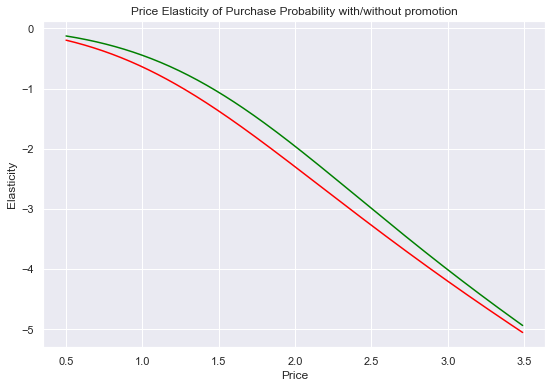

In [34]:
plt.figure(figsize=(9,6))
plt.plot(price_range,df_price_elasticities['Elasticity_Promotion_1'],color='green') # with promotion
plt.plot(price_range,df_price_elasticities['Elasticity_Promotion_NO'],color='red') # No promotion
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with/without promotion');

# Purchase prob elasticity is less elastic when PROMOTION exists (green line)
# Elasticity tipping point with promotion is $1.46, while no promotion is $1.27.
# People are more willing to buy products at promotional prices(eg. psychologically feel a bargain)
# Further, initial high prices & later promotion sounds a good biz strategy, than lower original prices alone. 

## Brand Choice

### Data Preparation

In [35]:
brand_choice=df_pa[df_pa['Incidence']==1]
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,2,0,0,1,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,2,0,0,1,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,2,0,0,1,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,2,0,0,1,0


In [36]:
Y=brand_choice['Brand']

In [37]:
# We interested in price of each brand, and interaction between them.
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [38]:
features=['Price_1', 'Price_2', 'Price_3', 'Price_4','Price_5']
X=brand_choice[features]

In [39]:
model_brand_choice=LogisticRegression(solver='sag',multi_class='multinomial')
model_brand_choice.fit(X,Y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [40]:
model_brand_choice.coef_

array([[-3.91595756,  0.65846075,  2.41772397,  0.70408345, -0.20210823],
       [ 1.27461207, -1.87985561, -0.2126465 , -0.20634109,  0.58786987],
       [ 1.62418918,  0.56210917,  0.50088403,  1.03951023,  0.45278794],
       [ 0.57453673,  0.39558776, -1.4006096 , -1.24624453,  0.24935003],
       [ 0.44261959,  0.26369792, -1.30535189, -0.29100805, -1.08789961]])

In [41]:
model_brand_choice_coef=pd.DataFrame(model_brand_choice.coef_)
model_brand_choice_coef

# coef_ each row is a Class(Y Label), and each column is a feature (X Label)

,0,1,2,3,4
0,-3.915958,0.658461,2.417724,0.704083,-0.202108
1,1.274612,-1.879856,-0.212647,-0.206341,0.587870
2,1.624189,0.562109,0.500884,1.039510,0.452788
3,0.574537,0.395588,-1.400610,-1.246245,0.249350
4,0.442620,0.263698,-1.305352,-0.291008,-1.087900


In [42]:
brand_choice_coef=model_brand_choice_coef.transpose()

In [43]:
coefficients=['Coef_brand_1','Coef_brand_2','Coef_brand_3','Coef_brand_4','Coef_brand_5']
brand_choice_coef.columns=[coefficients]
prices=['Price_1', 'Price_2', 'Price_3', 'Price_4','Price_5']
brand_choice_coef.index=[prices]
brand_choice_coef=brand_choice_coef.round(2)
brand_choice_coef # We can see how brand choice and price change correlated.

,Coef_brand_1,Coef_brand_2,Coef_brand_3,Coef_brand_4,Coef_brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


### Own Price Elasticity Brand 5

In [44]:
# This is to perform brand choice analysis from a brand's perspective.
# How the purchase prob change if price change 1%.

df_own_brand_5=pd.DataFrame(index=range(price_range.size))
df_own_brand_5['Price_1']=brand_choice['Price_1'].mean()
df_own_brand_5['Price_2']=brand_choice['Price_2'].mean()
df_own_brand_5['Price_3']=brand_choice['Price_3'].mean()
df_own_brand_5['Price_4']=brand_choice['Price_4'].mean()
df_own_brand_5['Price_5']=price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [45]:
predict_brand_5=model_brand_choice.predict_proba(df_own_brand_5)
predict_brand_5=predict_brand_5[:,4] # brand_5's predictions
beta_5=brand_choice_coef.iloc[4,4] # Beta
own_price_elasticity_brand_5=beta_5*price_range*(1-predict_brand_5)
df_price_elasticities['brand_5']=own_price_elasticity_brand_5
pd.options.display.max_rows=None
df_price_elasticities

,Price_Point,Mean_PE,Mean_PE_Segm_1,Mean_PE_Segm_2,Mean_PE_Segm_3,Mean_PE_Segm_0,Elasticity_Promotion_1,Elasticity_Promotion_NO,brand_5
0,0.50,-0.096020,-0.119085,-0.030809,-0.167906,-0.211181,-0.125732,-0.195650,-0.049055
1,0.51,-0.100072,-0.123268,-0.032570,-0.172827,-0.217751,-0.129848,-0.201772,-0.050616
2,0.52,-0.104250,-0.127544,-0.034418,-0.177819,-0.224430,-0.134043,-0.207996,-0.052207
3,0.53,-0.108558,-0.131915,-0.036356,-0.182882,-0.231216,-0.138317,-0.214323,-0.053827
4,0.54,-0.112998,-0.136382,-0.038389,-0.188016,-0.238112,-0.142673,-0.220754,-0.055477
5,0.55,-0.117575,-0.140947,-0.040521,-0.193222,-0.245118,-0.147111,-0.227290,-0.057158
6,0.56,-0.122290,-0.145611,-0.042755,-0.198500,-0.252235,-0.151632,-0.233932,-0.058871
7,0.57,-0.127149,-0.150376,-0.045098,-0.203851,-0.259464,-0.156236,-0.240681,-0.060615
8,0.58,-0.132153,-0.155243,-0.047553,-0.209275,-0.266804,-0.160926,-0.247536,-0.062391
9,0.59,-0.137307,-0.160214,-0.050125,-0.214773,-0.274258,-0.165701,-0.254500,-0.064199


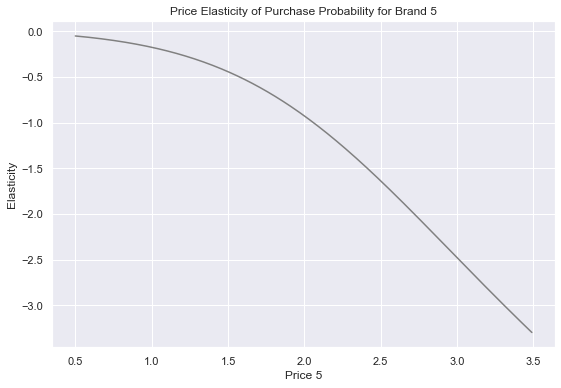

In [46]:
plt.figure(figsize=(9,6))
plt.plot(price_range,own_price_elasticity_brand_5,color='grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability for Brand 5');

### Cross Price Elasticity Brand 5, Cross Brand 4

In [47]:
# We will compare brand_5 with brand_4 as they are more similar.
# This is how brand_4 price change would affect brand_5 - cross price elasticity

df_own_brand_4=pd.DataFrame(index=range(price_range.size))
df_own_brand_4['Price_1']=brand_choice['Price_1'].mean()
df_own_brand_4['Price_2']=brand_choice['Price_2'].mean()
df_own_brand_4['Price_3']=brand_choice['Price_3'].mean()
df_own_brand_4['Price_4']=price_range


df_own_brand_4['Price_5']=brand_choice['Price_5'].mean()
df_own_brand_4

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296
5,1.384559,1.764717,2.006694,0.55,2.654296
6,1.384559,1.764717,2.006694,0.56,2.654296
7,1.384559,1.764717,2.006694,0.57,2.654296
8,1.384559,1.764717,2.006694,0.58,2.654296
9,1.384559,1.764717,2.006694,0.59,2.654296


In [48]:
predict_brand_4=model_brand_choice.predict_proba(df_own_brand_4)
predict_brand_4=predict_brand_4[:,3] # brand_4's predictions
beta5=brand_choice_coef.iloc[4,4] # Beta

# Cross Elasticity formula: E=-beta(own price)* price(cross_brand)*Pr(cross_brand)
# Cross Elasticity brand_5 cross brand_4: E=-beta5($brand5)* price_range($brand4)*Pr($brand4)


brand5_cross_brand4_price_elasticity=-beta5*price_range*predict_brand_4
df_price_elasticities['brand5_cross_brand4']=brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,Mean_PE_Segm_1,Mean_PE_Segm_2,Mean_PE_Segm_3,Mean_PE_Segm_0,Elasticity_Promotion_1,Elasticity_Promotion_NO,brand_5,brand5_cross_brand4
0,0.50,-0.096020,-0.119085,-0.030809,-0.167906,-0.211181,-0.125732,-0.195650,-0.049055,0.332011
1,0.51,-0.100072,-0.123268,-0.032570,-0.172827,-0.217751,-0.129848,-0.201772,-0.050616,0.337288
2,0.52,-0.104250,-0.127544,-0.034418,-0.177819,-0.224430,-0.134043,-0.207996,-0.052207,0.342507
3,0.53,-0.108558,-0.131915,-0.036356,-0.182882,-0.231216,-0.138317,-0.214323,-0.053827,0.347669
4,0.54,-0.112998,-0.136382,-0.038389,-0.188016,-0.238112,-0.142673,-0.220754,-0.055477,0.352773
5,0.55,-0.117575,-0.140947,-0.040521,-0.193222,-0.245118,-0.147111,-0.227290,-0.057158,0.357820
6,0.56,-0.122290,-0.145611,-0.042755,-0.198500,-0.252235,-0.151632,-0.233932,-0.058871,0.362809
7,0.57,-0.127149,-0.150376,-0.045098,-0.203851,-0.259464,-0.156236,-0.240681,-0.060615,0.367741
8,0.58,-0.132153,-0.155243,-0.047553,-0.209275,-0.266804,-0.160926,-0.247536,-0.062391,0.372614
9,0.59,-0.137307,-0.160214,-0.050125,-0.214773,-0.274258,-0.165701,-0.254500,-0.064199,0.377430


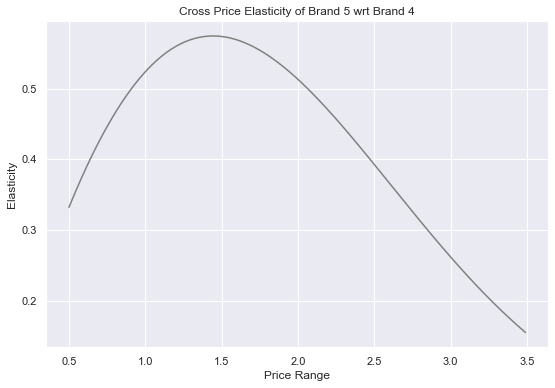

In [49]:
plt.figure(figsize=(9,6))
plt.plot(price_range,brand5_cross_brand4_price_elasticity,color='gray')
plt.xlabel('Price Range')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt Brand 4');

# Elasticities are positive across all (competitor increase price, our brand increase sales)
# The elasticity shows how much more sales %.

# brand_5 and brand_4 are substitutes (as E(cross brand)>0, positive)
# How strong the substitute: $1.65 is the tipping point, brand_4 are strong substitute before $.165 (E(cross brand)>E(own brand))
# However, brand_4 observed price is ranging $1.76 to $2.26
# Hence, brand_4 is still substitute for brand_5 but at a slower rate (weak substitute to some extend)

# Possible action: brand_5 to create marketing strategy to attract brand_4 customers. 
# However, targeting for all customers for the campaign can be tough.
# We will target a segment of customer next.

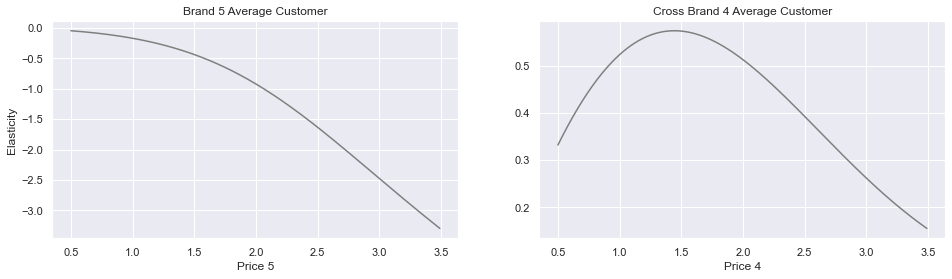

In [50]:
# Brand_5 price elasticity, brand_5 cross brand_4 elasticity (all customers taken into account, no sgmentations)

fig1, ax1 = plt.subplots(1, 2, figsize = (16, 4), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_xlabel('Price 5')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')
ax1[1].set_xlabel('Price 4');

### Own and Cross-Price Elasticity by Segment

#### $\color{orange}{\text{Well-Off}}$

In [51]:
# We continue brand_5, and take segment into consider (segment 'well-off' here).
brand_choice_s3=df_pa[(df_pa['Incidence']==1) & (df_pa['Segment']==3)]

pd.options.display.max_rows=100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,0,0,0,1
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,52,2,159052,2,1,3,0,0,0,1
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,52,2,159052,2,1,3,0,0,0,1
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,52,2,159052,2,1,3,0,0,0,1
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,52,2,159052,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,...,44,2,193816,2,1,3,0,0,0,1
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,...,44,2,193816,2,1,3,0,0,0,1
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,...,44,2,193816,2,1,3,0,0,0,1
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,...,44,2,193816,2,1,3,0,0,0,1


In [52]:
# Brand choice model fit.
Y = brand_choice_s3['Brand']
brand_choice_s3=pd.get_dummies(brand_choice_s3,columns=['Brand'],prefix='Brand',prefix_sep='_')
X=brand_choice_s3[features]

model_brand_choice_s3=LogisticRegression(solver='sag', multi_class='multinomial',max_iter=300)
model_brand_choice_s3.fit(X,Y)

# Coefficients- Brands and prices coefficient for segment 3(well-off).
bc_coef=pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns=[coefficients]
bc_coef.index=[prices]
bc_coef 


,Coef_brand_1,Coef_brand_2,Coef_brand_3,Coef_brand_4,Coef_brand_5
Price_1,-2.151333,1.326259,0.817675,0.116758,-0.109360
Price_2,-0.958628,-1.381014,1.288137,0.779522,0.271983
Price_3,2.007881,-1.651692,-0.491349,0.028487,0.106671
Price_4,2.524359,0.957467,-0.254548,-1.896214,-1.331063
Price_5,-0.993615,-0.299796,1.173241,0.563197,-0.443028


#### $\color{orange}{\text{Well-Off: Own-Brand Price Elasticity}}$

In [53]:
# Calc brand 5, segment 3(well-off)- own brand price elasticity.
df_own_brand_5_s3=pd.DataFrame(index=np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range
df_own_brand_5_s3

predict_own_brand_5_s3=model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
proba_own_brand_5_s3=predict_own_brand_5_s3[:,4]
proba_own_brand_5_s3

beta5=bc_coef.iloc[4,4] # -0.44

own_price_elasticity_brand_5_s3=beta5*price_range*(1-proba_own_brand_5_s3)
df_price_elasticities['Brand 5 S3']=own_price_elasticity_brand_5_s3
df_price_elasticities


,Price_Point,Mean_PE,Mean_PE_Segm_1,Mean_PE_Segm_2,Mean_PE_Segm_3,Mean_PE_Segm_0,Elasticity_Promotion_1,Elasticity_Promotion_NO,brand_5,brand5_cross_brand4,Brand 5 S3
0,0.50,-0.096020,-0.119085,-0.030809,-0.167906,-0.211181,-0.125732,-0.195650,-0.049055,0.332011,-0.120842
1,0.51,-0.100072,-0.123268,-0.032570,-0.172827,-0.217751,-0.129848,-0.201772,-0.050616,0.337288,-0.123299
2,0.52,-0.104250,-0.127544,-0.034418,-0.177819,-0.224430,-0.134043,-0.207996,-0.052207,0.342507,-0.125761
3,0.53,-0.108558,-0.131915,-0.036356,-0.182882,-0.231216,-0.138317,-0.214323,-0.053827,0.347669,-0.128227
4,0.54,-0.112998,-0.136382,-0.038389,-0.188016,-0.238112,-0.142673,-0.220754,-0.055477,0.352773,-0.130697
...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.007891,-5.680525,-12.547888,-4.022776,-5.051761,-4.861468,-4.983097,-3.231573,0.162233,-1.356443
296,3.46,-8.033139,-5.700682,-12.584823,-4.037649,-5.068617,-4.879669,-5.000003,-3.247767,0.160333,-1.361861
297,3.47,-8.058352,-5.720801,-12.621740,-4.052505,-5.085454,-4.897840,-5.016889,-3.263929,0.158447,-1.367278
298,3.48,-8.083531,-5.740884,-12.658642,-4.067344,-5.102273,-4.915981,-5.033755,-3.280058,0.156576,-1.372693


#### $\color{orange}{\text{Well-Off: Cross-Brand Price Elasticity}}$

In [54]:
# Calc cross-brand price elasticity for brand 5 wrt brand 4 for segment 3(well-off).
df_brand5_cross_brand4_s3=pd.DataFrame(index=np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] =  price_range
df_brand5_cross_brand4_s3['Price_5'] =brand_choice_s3['Price_5'].mean()
df_brand5_cross_brand4_s3

predict_brand5_cross_brand4_s3=model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
proba_cross_brand5_s3=predict_brand5_cross_brand4_s3[:,3]
proba_cross_brand5_s3

beta5=bc_coef.iloc[4,4] # -0.44

# cross brand price elasticities.
brand5_cross_brand4_price_elasticity_s3=-beta5*price_range*proba_cross_brand5_s3
df_price_elasticities['Brand_5_cross_brand_4_S3']=brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows=None
df_price_elasticities

,Price_Point,Mean_PE,Mean_PE_Segm_1,Mean_PE_Segm_2,Mean_PE_Segm_3,Mean_PE_Segm_0,Elasticity_Promotion_1,Elasticity_Promotion_NO,brand_5,brand5_cross_brand4,Brand 5 S3,Brand_5_cross_brand_4_S3
0,0.50,-0.096020,-0.119085,-0.030809,-0.167906,-0.211181,-0.125732,-0.195650,-0.049055,0.332011,-0.120842,0.196079
1,0.51,-0.100072,-0.123268,-0.032570,-0.172827,-0.217751,-0.129848,-0.201772,-0.050616,0.337288,-0.123299,0.199861
2,0.52,-0.104250,-0.127544,-0.034418,-0.177819,-0.224430,-0.134043,-0.207996,-0.052207,0.342507,-0.125761,0.203637
3,0.53,-0.108558,-0.131915,-0.036356,-0.182882,-0.231216,-0.138317,-0.214323,-0.053827,0.347669,-0.128227,0.207406
4,0.54,-0.112998,-0.136382,-0.038389,-0.188016,-0.238112,-0.142673,-0.220754,-0.055477,0.352773,-0.130697,0.211169
5,0.55,-0.117575,-0.140947,-0.040521,-0.193222,-0.245118,-0.147111,-0.227290,-0.057158,0.357820,-0.133172,0.214925
6,0.56,-0.122290,-0.145611,-0.042755,-0.198500,-0.252235,-0.151632,-0.233932,-0.058871,0.362809,-0.135652,0.218675
7,0.57,-0.127149,-0.150376,-0.045098,-0.203851,-0.259464,-0.156236,-0.240681,-0.060615,0.367741,-0.138137,0.222419
8,0.58,-0.132153,-0.155243,-0.047553,-0.209275,-0.266804,-0.160926,-0.247536,-0.062391,0.372614,-0.140627,0.226156
9,0.59,-0.137307,-0.160214,-0.050125,-0.214773,-0.274258,-0.165701,-0.254500,-0.064199,0.377430,-0.143123,0.229886


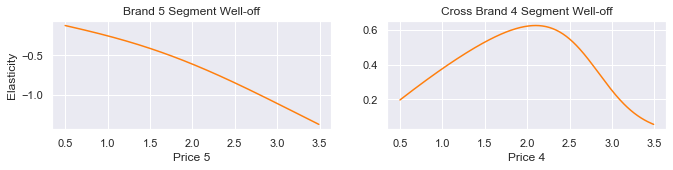

In [55]:
fig1, ax1 = plt.subplots(1, 2, figsize = (11, 2), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax1[0].set_title('Brand 5 Segment Well-off')
ax1[0].set_xlabel('Price 5')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax1[1].set_title('Cross Brand 4 Segment Well-off')
ax1[1].set_xlabel('Price 4');

#### $\color{blue}{\text{Standard}}$

In [56]:
# Step 1: Filter to get segment 0 (Standard)
brand_choice_s0=df_pa[(df_pa['Incidence']==1) & (df_pa['Segment']==0)]

# Step 2: Brand choice model fit.
Y = brand_choice_s0['Brand']
brand_choice_s0=pd.get_dummies(brand_choice_s0,columns=['Brand'],prefix='Brand',prefix_sep='_')
X=brand_choice_s0[features]

model_brand_choice_s0=LogisticRegression(solver='sag', multi_class='multinomial',max_iter=300)
model_brand_choice_s0.fit(X,Y)


# Step 3: Coefficients- Brands and prices coefficient for segment 0.
bc_coef=pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns=[coefficients]
bc_coef.index=[prices]
bc_coef 

# Step 4: Standard: Own-Brand Price Elasticity
df_own_brand_5_s0=pd.DataFrame(index=np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range
df_own_brand_5_s0

predict_own_brand_5_s0=model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
predict_own_brand_5_s0=predict_own_brand_5_s0[:,4]
predict_own_brand_5_s0

beta5=bc_coef.iloc[4,4] # -1.15

own_price_elasticity_brand_5_s0=beta5*price_range*(1-predict_own_brand_5_s0)
df_price_elasticities['Brand 5 S0']=own_price_elasticity_brand_5_s0
df_price_elasticities

# Step 5: Standard: Cross-Brand Price Elasticity
df_brand5_cross_brand4_s0=pd.DataFrame(index=np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] =  price_range
df_brand5_cross_brand4_s0['Price_5'] =brand_choice_s0['Price_5'].mean()
df_brand5_cross_brand4_s0

predict_brand5_cross_brand4_s0=model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
proba_cross_brand5_s0=predict_brand5_cross_brand4_s0[:,3]
proba_cross_brand5_s0


# cross brand price elasticities.
brand5_cross_brand4_price_elasticity_s0=-beta5*price_range*proba_cross_brand5_s0
df_price_elasticities['Brand_5_cross_brand_4_S0']=brand5_cross_brand4_price_elasticity_s0

#### $\color{green}{\text{Career-Focused}}$

In [57]:
# Step 1: Filter to get segment 1 (Career-Focused)
brand_choice_s1=df_pa[(df_pa['Incidence']==1) & (df_pa['Segment']==1)]

# Step 2: Brand choice model fit.
Y = brand_choice_s1['Brand']
brand_choice_s1=pd.get_dummies(brand_choice_s1,columns=['Brand'],prefix='Brand',prefix_sep='_')
X=brand_choice_s1[features]

model_brand_choice_s1=LogisticRegression(solver='sag', multi_class='multinomial',max_iter=300)
model_brand_choice_s1.fit(X,Y)


# Step 3: Coefficients- Brands and prices coefficient for segment 0.
bc_coef=pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns=[coefficients]
bc_coef.index=[prices]
bc_coef 

# Step 4: Standard: Own-Brand Price Elasticity
df_own_brand_5_s1=pd.DataFrame(index=np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range
df_own_brand_5_s1

predict_own_brand_5_s1=model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
predict_own_brand_5_s1=predict_own_brand_5_s1[:,4]
predict_own_brand_5_s1

beta5=bc_coef.iloc[4,4] # -0.55

own_price_elasticity_brand_5_s1=beta5*price_range*(1-predict_own_brand_5_s1)
df_price_elasticities['Brand 5 S1']=own_price_elasticity_brand_5_s1
df_price_elasticities

# Step 5: Standard: Cross-Brand Price Elasticity
df_brand5_cross_brand4_s1=pd.DataFrame(index=np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] =  price_range
df_brand5_cross_brand4_s1['Price_5'] =brand_choice_s1['Price_5'].mean()
df_brand5_cross_brand4_s1

predict_brand5_cross_brand4_s1=model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
proba_cross_brand5_s1=predict_brand5_cross_brand4_s1[:,3]
proba_cross_brand5_s1


# cross brand price elasticities.
brand5_cross_brand4_price_elasticity_s1=-beta5*price_range*proba_cross_brand5_s1
df_price_elasticities['Brand_5_cross_brand_4_S1']=brand5_cross_brand4_price_elasticity_s1
df_price_elasticities

,Price_Point,Mean_PE,Mean_PE_Segm_1,Mean_PE_Segm_2,Mean_PE_Segm_3,Mean_PE_Segm_0,Elasticity_Promotion_1,Elasticity_Promotion_NO,brand_5,brand5_cross_brand4,Brand 5 S3,Brand_5_cross_brand_4_S3,Brand 5 S0,Brand_5_cross_brand_4_S0,Brand 5 S1,Brand_5_cross_brand_4_S1
0,0.50,-0.096020,-0.119085,-0.030809,-0.167906,-0.211181,-0.125732,-0.195650,-0.049055,0.332011,-0.120842,0.196079,-0.122301,0.183832,-0.022143,0.098153
1,0.51,-0.100072,-0.123268,-0.032570,-0.172827,-0.217751,-0.129848,-0.201772,-0.050616,0.337288,-0.123299,0.199861,-0.125510,0.186002,-0.022691,0.099405
2,0.52,-0.104250,-0.127544,-0.034418,-0.177819,-0.224430,-0.134043,-0.207996,-0.052207,0.342507,-0.125761,0.203637,-0.128756,0.188118,-0.023243,0.100631
3,0.53,-0.108558,-0.131915,-0.036356,-0.182882,-0.231216,-0.138317,-0.214323,-0.053827,0.347669,-0.128227,0.207406,-0.132038,0.190181,-0.023800,0.101831
4,0.54,-0.112998,-0.136382,-0.038389,-0.188016,-0.238112,-0.142673,-0.220754,-0.055477,0.352773,-0.130697,0.211169,-0.135358,0.192191,-0.024362,0.103007
5,0.55,-0.117575,-0.140947,-0.040521,-0.193222,-0.245118,-0.147111,-0.227290,-0.057158,0.357820,-0.133172,0.214925,-0.138717,0.194147,-0.024929,0.104157
6,0.56,-0.122290,-0.145611,-0.042755,-0.198500,-0.252235,-0.151632,-0.233932,-0.058871,0.362809,-0.135652,0.218675,-0.142114,0.196052,-0.025500,0.105282
7,0.57,-0.127149,-0.150376,-0.045098,-0.203851,-0.259464,-0.156236,-0.240681,-0.060615,0.367741,-0.138137,0.222419,-0.145550,0.197904,-0.026077,0.106382
8,0.58,-0.132153,-0.155243,-0.047553,-0.209275,-0.266804,-0.160926,-0.247536,-0.062391,0.372614,-0.140627,0.226156,-0.149026,0.199704,-0.026658,0.107457
9,0.59,-0.137307,-0.160214,-0.050125,-0.214773,-0.274258,-0.165701,-0.254500,-0.064199,0.377430,-0.143123,0.229886,-0.152541,0.201454,-0.027244,0.108508


#### $\color{red}{\text{Fewer-Opportunities}}$

In [58]:
# Step 1: Filter to get segment 2 (Fewer-Opportunities)
brand_choice_s2=df_pa[(df_pa['Incidence']==1) & (df_pa['Segment']==2)]

# Step 2: Brand choice model fit.
Y = brand_choice_s2['Brand']
brand_choice_s2=pd.get_dummies(brand_choice_s2,columns=['Brand'],prefix='Brand',prefix_sep='_')
X=brand_choice_s2[features]

model_brand_choice_s2=LogisticRegression(solver='sag', multi_class='multinomial',max_iter=300)
model_brand_choice_s2.fit(X,Y)


# Step 3: Coefficients- Brands and prices coefficient for segment 0.
bc_coef=pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns=[coefficients]
bc_coef.index=[prices]
bc_coef 

# Step 4: Standard: Own-Brand Price Elasticity
df_own_brand_5_s2=pd.DataFrame(index=np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range
df_own_brand_5_s2

predict_own_brand_5_s2=model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
predict_own_brand_5_s2=predict_own_brand_5_s2[:,4]
predict_own_brand_5_s2

beta5=bc_coef.iloc[4,4] # -2.93

own_price_elasticity_brand_5_s2=beta5*price_range*(1-predict_own_brand_5_s2)
df_price_elasticities['Brand 5 S2']=own_price_elasticity_brand_5_s2
df_price_elasticities

# Step 5: Standard: Cross-Brand Price Elasticity
df_brand5_cross_brand4_s2=pd.DataFrame(index=np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] =  price_range
df_brand5_cross_brand4_s2['Price_5'] =brand_choice_s2['Price_5'].mean()
df_brand5_cross_brand4_s2

predict_brand5_cross_brand4_s2=model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
proba_cross_brand5_s2=predict_brand5_cross_brand4_s2[:,3]
proba_cross_brand5_s2


# cross brand price elasticities.
brand5_cross_brand4_price_elasticity_s2=-beta5*price_range*proba_cross_brand5_s2
df_price_elasticities['Brand_5_cross_brand_4_S2']=brand5_cross_brand4_price_elasticity_s2
df_price_elasticities

,Price_Point,Mean_PE,Mean_PE_Segm_1,Mean_PE_Segm_2,Mean_PE_Segm_3,Mean_PE_Segm_0,Elasticity_Promotion_1,Elasticity_Promotion_NO,brand_5,brand5_cross_brand4,Brand 5 S3,Brand_5_cross_brand_4_S3,Brand 5 S0,Brand_5_cross_brand_4_S0,Brand 5 S1,Brand_5_cross_brand_4_S1,Brand 5 S2,Brand_5_cross_brand_4_S2
0,0.50,-0.096020,-0.119085,-0.030809,-0.167906,-0.211181,-0.125732,-0.195650,-0.049055,0.332011,-0.120842,0.196079,-0.122301,0.183832,-0.022143,0.098153,-0.002786,0.488171
1,0.51,-0.100072,-0.123268,-0.032570,-0.172827,-0.217751,-0.129848,-0.201772,-0.050616,0.337288,-0.123299,0.199861,-0.125510,0.186002,-0.022691,0.099405,-0.002951,0.494346
2,0.52,-0.104250,-0.127544,-0.034418,-0.177819,-0.224430,-0.134043,-0.207996,-0.052207,0.342507,-0.125761,0.203637,-0.128756,0.188118,-0.023243,0.100631,-0.003126,0.500389
3,0.53,-0.108558,-0.131915,-0.036356,-0.182882,-0.231216,-0.138317,-0.214323,-0.053827,0.347669,-0.128227,0.207406,-0.132038,0.190181,-0.023800,0.101831,-0.003309,0.506302
4,0.54,-0.112998,-0.136382,-0.038389,-0.188016,-0.238112,-0.142673,-0.220754,-0.055477,0.352773,-0.130697,0.211169,-0.135358,0.192191,-0.024362,0.103007,-0.003502,0.512084
5,0.55,-0.117575,-0.140947,-0.040521,-0.193222,-0.245118,-0.147111,-0.227290,-0.057158,0.357820,-0.133172,0.214925,-0.138717,0.194147,-0.024929,0.104157,-0.003705,0.517736
6,0.56,-0.122290,-0.145611,-0.042755,-0.198500,-0.252235,-0.151632,-0.233932,-0.058871,0.362809,-0.135652,0.218675,-0.142114,0.196052,-0.025500,0.105282,-0.003919,0.523260
7,0.57,-0.127149,-0.150376,-0.045098,-0.203851,-0.259464,-0.156236,-0.240681,-0.060615,0.367741,-0.138137,0.222419,-0.145550,0.197904,-0.026077,0.106382,-0.004143,0.528656
8,0.58,-0.132153,-0.155243,-0.047553,-0.209275,-0.266804,-0.160926,-0.247536,-0.062391,0.372614,-0.140627,0.226156,-0.149026,0.199704,-0.026658,0.107457,-0.004380,0.533924
9,0.59,-0.137307,-0.160214,-0.050125,-0.214773,-0.274258,-0.165701,-0.254500,-0.064199,0.377430,-0.143123,0.229886,-0.152541,0.201454,-0.027244,0.108508,-0.004628,0.539067


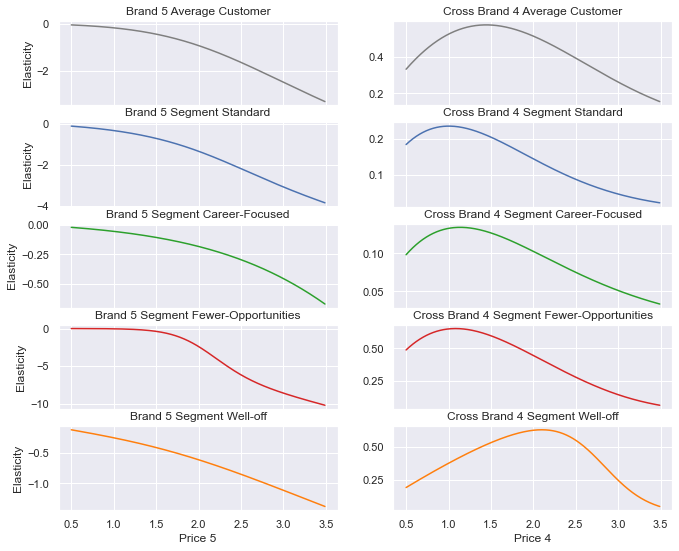

In [59]:
# Plotting own and cross brand price elasticity (avg customers and each of the four segments)
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4');

# Observations -'Career-Focused':
# The least elastic of the brand, and the cross brand elasticity is also low(most loyal, unlike to switch brand)
# Marketing team can potentially increase price, with less worries of losing market share.

# Observations -'Fewer-Opportunities':
# The shape mostly due to less data (as <1% of the group use the brand), to be more representative, need more data.

# For brand_5, Marketing team can be more focused on 'Career-Focused' and 'Well-off' segments based on plots below.

## Purchase Quantity

### Price Elasticity of Purchase Quantity

In [60]:
df_purchase_quantity=df_pa[df_pa['Incidence']==1] 
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0


In [61]:
# Create brand dummies.
df_purchase_quantity=pd.get_dummies(df_purchase_quantity,columns=['Brand'],prefix='Brand', prefix_sep="_") 
df_purchase_quantity.describe() # Quantity range beween 1 to 15, avg is 2.78 times.

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Segment,Segment_0,Segment_1,Segment_2,Segment_3,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,1.581910,0.175229,0.299290,0.293824,0.231657,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,1.028171,0.380176,0.457962,0.455528,0.421906,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
df_purchase_quantity.columns.values # through values, to find relevant features.

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [63]:
# For reach incidence(purchase record),find the price of the product
df_purchase_quantity['Price_Incidence']=(df_purchase_quantity['Price_1']*df_purchase_quantity['Brand_1']+
                                         df_purchase_quantity['Price_2']*df_purchase_quantity['Brand_2']+
                                         df_purchase_quantity['Price_3']*df_purchase_quantity['Brand_3']+
                                         df_purchase_quantity['Price_4']*df_purchase_quantity['Brand_4']+
                                         df_purchase_quantity['Price_5']*df_purchase_quantity['Brand_5'])

# For reach incidence(purchase record),find the promotion of the product
df_purchase_quantity['Promotion_Incidence']=(df_purchase_quantity['Promotion_1']*df_purchase_quantity['Brand_1']+
                                             df_purchase_quantity['Promotion_2']*df_purchase_quantity['Brand_2']+
                                             df_purchase_quantity['Promotion_3']*df_purchase_quantity['Brand_3']+
                                             df_purchase_quantity['Promotion_4']*df_purchase_quantity['Brand_4']+
                                             df_purchase_quantity['Promotion_5']*df_purchase_quantity['Brand_5'])

### Model Estimation - Linear Regression

In [64]:
X=df_purchase_quantity[['Price_Incidence','Promotion_Incidence']]
pd.options.display.max_rows=100
X

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0
...,...,...
58621,1.89,0
58648,1.35,1
58674,1.85,1
58687,1.51,0


In [65]:
Y=df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [66]:
# Linear regression model - fit
model_quantity=LinearRegression()
model_quantity.fit(X,Y)

LinearRegression()

In [67]:
model_quantity.coef_ 
# The coef of both price and promotion are negative. 

# Here promotion reflects negatively on purchase quantity of avg client - this is unexpected. 
# and We will ignore here, due to its complexity. 

array([-0.8173651 , -0.10504673])

### Price Elasticity with Promotion

In [68]:
# Price elasticity of purchase quantity - scenario one: with promotion

df_price_elasticity_quantity=pd.DataFrame(index=range(price_range.size))
df_price_elasticity_quantity['Price_Incidence']=price_range
df_price_elasticity_quantity['Promotion_Incidence']=1

In [69]:
beta_quantity=model_quantity.coef_[0] # index[0] is the coef of price. 

In [70]:
predict_quantity=model_quantity.predict(df_price_elasticity_quantity)

In [71]:
# Formula for cal the new Price Elasticity of Purchase Quantity
price_elasticity_quantity_promotion_yes=beta_quantity*price_range/predict_quantity

In [72]:
df_price_elasticities['PE_Quantity_Promotion_1']=price_elasticity_quantity_promotion_yes
df_price_elasticities

,Price_Point,Mean_PE,Mean_PE_Segm_1,Mean_PE_Segm_2,Mean_PE_Segm_3,Mean_PE_Segm_0,Elasticity_Promotion_1,Elasticity_Promotion_NO,brand_5,brand5_cross_brand4,Brand 5 S3,Brand_5_cross_brand_4_S3,Brand 5 S0,Brand_5_cross_brand_4_S0,Brand 5 S1,Brand_5_cross_brand_4_S1,Brand 5 S2,Brand_5_cross_brand_4_S2,PE_Quantity_Promotion_1
0,0.50,-0.096020,-0.119085,-0.030809,-0.167906,-0.211181,-0.125732,-0.195650,-0.049055,0.332011,-0.120842,0.196079,-0.122301,0.183832,-0.022143,0.098153,-0.002786,0.488171,-0.102157
1,0.51,-0.100072,-0.123268,-0.032570,-0.172827,-0.217751,-0.129848,-0.201772,-0.050616,0.337288,-0.123299,0.199861,-0.125510,0.186002,-0.022691,0.099405,-0.002951,0.494346,-0.104413
2,0.52,-0.104250,-0.127544,-0.034418,-0.177819,-0.224430,-0.134043,-0.207996,-0.052207,0.342507,-0.125761,0.203637,-0.128756,0.188118,-0.023243,0.100631,-0.003126,0.500389,-0.106679
3,0.53,-0.108558,-0.131915,-0.036356,-0.182882,-0.231216,-0.138317,-0.214323,-0.053827,0.347669,-0.128227,0.207406,-0.132038,0.190181,-0.023800,0.101831,-0.003309,0.506302,-0.108954
4,0.54,-0.112998,-0.136382,-0.038389,-0.188016,-0.238112,-0.142673,-0.220754,-0.055477,0.352773,-0.130697,0.211169,-0.135358,0.192191,-0.024362,0.103007,-0.003502,0.512084,-0.111238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.007891,-5.680525,-12.547888,-4.022776,-5.051761,-4.861468,-4.983097,-3.231573,0.162233,-1.356443,0.064004,-3.792908,0.025394,-0.648782,0.034566,-10.070320,0.062921,-1.774292
296,3.46,-8.033139,-5.700682,-12.584823,-4.037649,-5.068617,-4.879669,-5.000003,-3.247767,0.160333,-1.361861,0.061801,-3.807589,0.025018,-0.653725,0.034252,-10.101079,0.061685,-1.788634
297,3.47,-8.058352,-5.720801,-12.621740,-4.052505,-5.085454,-4.897840,-5.016889,-3.263929,0.158447,-1.367278,0.059664,-3.822222,0.024646,-0.658696,0.033940,-10.131784,0.060468,-1.803124
298,3.48,-8.083531,-5.740884,-12.658642,-4.067344,-5.102273,-4.915981,-5.033755,-3.280058,0.156576,-1.372693,0.057594,-3.836809,0.024279,-0.663695,0.033631,-10.162436,0.059270,-1.817766


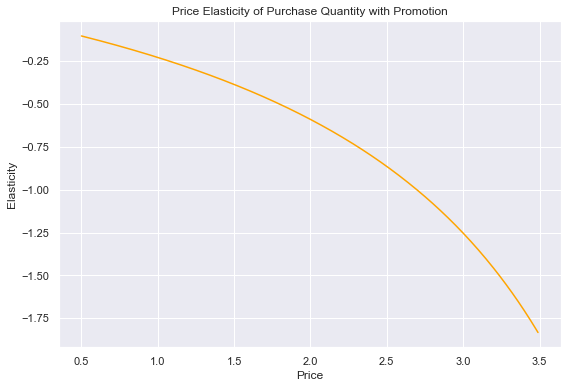

In [73]:
plt.figure(figsize=(9,6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes,color='orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion');

### Price Elasticity without Promotion

In [74]:
# Price elasticity of purchase quantity - scenario two: NO promotion

df_price_elasticity_quantity=pd.DataFrame(index=range(price_range.size))
df_price_elasticity_quantity['Price_Incidence']=price_range
df_price_elasticity_quantity['Promotion_Incidence']=0 

beta_quantity=model_quantity.coef_[0] # index[0] is the coef of price. 

predict_quantity=model_quantity.predict(df_price_elasticity_quantity)

# Formula for cal the new Price Elasticity of Purchase Quantity
price_elasticity_quantity_promotion_no=beta_quantity*price_range/predict_quantity

df_price_elasticities['PE_Quantity_Promotion_0']=price_elasticity_quantity_promotion_no
df_price_elasticities

,Price_Point,Mean_PE,Mean_PE_Segm_1,Mean_PE_Segm_2,Mean_PE_Segm_3,Mean_PE_Segm_0,Elasticity_Promotion_1,Elasticity_Promotion_NO,brand_5,brand5_cross_brand4,Brand 5 S3,Brand_5_cross_brand_4_S3,Brand 5 S0,Brand_5_cross_brand_4_S0,Brand 5 S1,Brand_5_cross_brand_4_S1,Brand 5 S2,Brand_5_cross_brand_4_S2,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096020,-0.119085,-0.030809,-0.167906,-0.211181,-0.125732,-0.195650,-0.049055,0.332011,-0.120842,0.196079,-0.122301,0.183832,-0.022143,0.098153,-0.002786,0.488171,-0.102157,-0.099543
1,0.51,-0.100072,-0.123268,-0.032570,-0.172827,-0.217751,-0.129848,-0.201772,-0.050616,0.337288,-0.123299,0.199861,-0.125510,0.186002,-0.022691,0.099405,-0.002951,0.494346,-0.104413,-0.101736
2,0.52,-0.104250,-0.127544,-0.034418,-0.177819,-0.224430,-0.134043,-0.207996,-0.052207,0.342507,-0.125761,0.203637,-0.128756,0.188118,-0.023243,0.100631,-0.003126,0.500389,-0.106679,-0.103939
3,0.53,-0.108558,-0.131915,-0.036356,-0.182882,-0.231216,-0.138317,-0.214323,-0.053827,0.347669,-0.128227,0.207406,-0.132038,0.190181,-0.023800,0.101831,-0.003309,0.506302,-0.108954,-0.106150
4,0.54,-0.112998,-0.136382,-0.038389,-0.188016,-0.238112,-0.142673,-0.220754,-0.055477,0.352773,-0.130697,0.211169,-0.135358,0.192191,-0.024362,0.103007,-0.003502,0.512084,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.007891,-5.680525,-12.547888,-4.022776,-5.051761,-4.861468,-4.983097,-3.231573,0.162233,-1.356443,0.064004,-3.792908,0.025394,-0.648782,0.034566,-10.070320,0.062921,-1.774292,-1.664290
296,3.46,-8.033139,-5.700682,-12.584823,-4.037649,-5.068617,-4.879669,-5.000003,-3.247767,0.160333,-1.361861,0.061801,-3.807589,0.025018,-0.653725,0.034252,-10.101079,0.061685,-1.788634,-1.677205
297,3.47,-8.058352,-5.720801,-12.621740,-4.052505,-5.085454,-4.897840,-5.016889,-3.263929,0.158447,-1.367278,0.059664,-3.822222,0.024646,-0.658696,0.033940,-10.131784,0.060468,-1.803124,-1.690246
298,3.48,-8.083531,-5.740884,-12.658642,-4.067344,-5.102273,-4.915981,-5.033755,-3.280058,0.156576,-1.372693,0.057594,-3.836809,0.024279,-0.663695,0.033631,-10.162436,0.059270,-1.817766,-1.703414


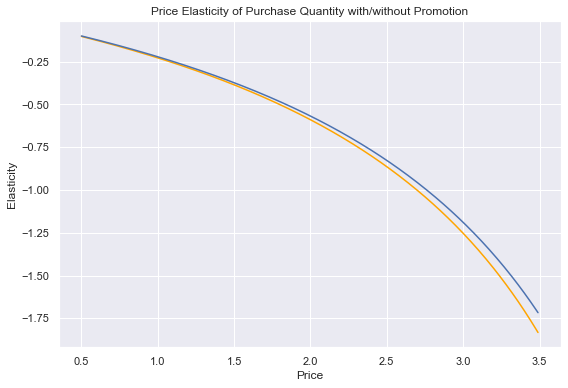

In [75]:
plt.figure(figsize=(9,6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color='orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with/without Promotion');

# From the plot,price elasticity of purchase quantities are very similar - with or without promotions.
# Looks like promotion is not a key factor for customer purchase decision of how many quantities to buy. 